In [ ]:
import os
import xml.etree.ElementTree as ET

def convert_voc_to_yolo_from_xml_size(xml_path, classes, output_dir):
    # Parse the XML file
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    # Get file name (without extension)
    file_name = os.path.splitext(os.path.basename(xml_path))[0]
    
    # Extract image width and height from the XML file
    size_element = root.find('size')
    if size_element is None:
        print(f"No <size> info in XML file: {xml_path}")
        return

    img_width = int(size_element.find('width').text)
    img_height = int(size_element.find('height').text)
    
    # Path of the YOLO-format label file
    yolo_label_path = os.path.join(output_dir, f"{file_name}.txt")
    
    # Open the file for writing
    with open(yolo_label_path, 'w') as label_file:
        # Iterate over object tags in the XML
        for obj in root.iter('object'):
            # Get object class
            class_name = obj.find('name').text
            if class_name not in classes:
                continue
            
            class_id = classes.index(class_name)  # Class index
            
            # Get the bounding box
            bndbox = obj.find('bndbox')
            xmin = float(bndbox.find('xmin').text)
            ymin = float(bndbox.find('ymin').text)
            xmax = float(bndbox.find('xmax').text)
            ymax = float(bndbox.find('ymax').text)
            
            # Compute normalized center coordinates and width/height
            x_center = (xmin + xmax) / 2.0 / img_width
            y_center = (ymin + ymax) / 2.0 / img_height
            width = (xmax - xmin) / img_width
            height = (ymax - ymin) / img_height
            
            # Write the converted YOLO format to file
            label_file.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

# When calling the function, dynamically obtain image size from the XML file
def convert_all_voc_to_yolo(voc_folder, output_folder, classes):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Traverse the VOC label folder
    for xml_file in os.listdir(voc_folder):
        if xml_file.endswith('.xml'):
            xml_path = os.path.join(voc_folder, xml_file)
            # Convert and save as YOLO format
            convert_voc_to_yolo_from_xml_size(xml_path, classes, output_folder)


if __name__ == "__main__":
    # Set the folder path of VOC labels, the output folder path, and the class list
    voc_folder = r""  # VOC label folder
    output_folder = r""       # Output YOLO label folder
    classes = ['fire', 'smoke']  # Class list; modify as needed
    
    # Convert all VOC labels to YOLO format
    convert_all_voc_to_yolo(voc_folder, output_folder, classes)


In [1]:
# 根据设置重命名文件
import os

# 设置你的文件夹路径
folder_path = r"G:\A-desktop\FFSD\Partial samples"

# 获取文件夹中的所有文件
files = os.listdir(folder_path)

# 按文件名排序，确保顺序一致
files.sort()

# 初始化起始文件名
start_name = 1

# 遍历所有文件并重命名
for index, file in enumerate(files):
    # 获取文件的扩展名
    file_extension = os.path.splitext(file)[1]

    # 构造新的文件名
    new_name = f"{start_name + index:05d}{file_extension}"

    # 获取旧文件的完整路径和新文件的完整路径
    old_file = os.path.join(folder_path, file)
    new_file = os.path.join(folder_path, new_name)

    # 重命名文件
    os.rename(old_file, new_file)

    print(f"Renamed: {file} -> {new_name}")


Renamed: 00003-3092419877.png -> 00001.png
Renamed: 00214-3551656869.png -> 00002.png
Renamed: 00310.png -> 00003.png
Renamed: 00404-1001213852.png -> 00004.png
Renamed: 00507-580069835.png -> 00005.png
Renamed: 00546-3537845211.png -> 00006.png
Renamed: 00572-2675420368.png -> 00007.png
Renamed: 00581-2915635474.png -> 00008.png
Renamed: 00641-947936469.png -> 00009.png
Renamed: 00661-1714396929.png -> 00010.png
Renamed: 00747-2340987049.png -> 00011.png
Renamed: 00762-3929885289.png -> 00012.png
Renamed: 00767-2831631089.png -> 00013.png
Renamed: 00819-4224952141.png -> 00014.png
Renamed: 00855-3555343286.png -> 00015.png
Renamed: 00895-3281911791.png -> 00016.png
Renamed: 00927-859427374.png -> 00017.png
Renamed: 00934-372577510.png -> 00018.png
Renamed: 00952-4149739871.png -> 00019.png
Renamed: 01085-3692716717.png -> 00020.png
Renamed: 01104-3932989147.png -> 00021.png
Renamed: 01122-3475617816.png -> 00022.png
Renamed: 01133-2925608572.png -> 00023.png
Renamed: 01139-2892089269.

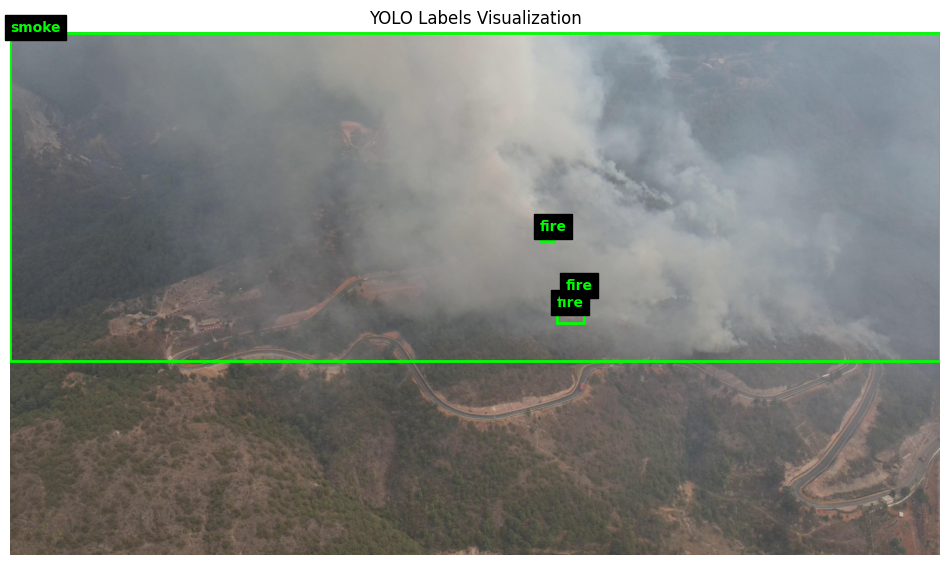

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def draw_yolo_bboxes_with_plt(image_path, label_path, class_names):
    """
    使用 matplotlib 在图片上绘制 YOLO 格式的标签框。
    
    :param image_path: 图片路径
    :param label_path: YOLO 标签文件路径
    :param class_names: 类别名称列表
    """
    # 加载图片
    image = Image.open(image_path)
    img_width, img_height = image.size

    # 创建 matplotlib 图形
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)
    
    # 读取 YOLO 标签文件
    with open(label_path, 'r') as file:
        labels = file.readlines()
    
    # 遍历每个标签
    for label in labels:
        parts = label.strip().split()
        class_id = int(parts[0])  # 类别ID
        x_center, y_center, width, height = map(float, parts[1:5])  # 归一化的坐标和尺寸
        
        # 转换回原始坐标
        xmin = (x_center - width / 2) * img_width
        ymin = (y_center - height / 2) * img_height
        box_width = width * img_width
        box_height = height * img_height
        
        # 获取类别名称
        class_name = class_names[class_id] if class_id < len(class_names) else f"Class {class_id}"
        
        # 创建矩形框
        rect = patches.Rectangle((xmin, ymin), box_width, box_height, linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
        
        # 添加类别标签
        ax.text(xmin, ymin - 5, class_name, color='lime', fontsize=10, weight='bold', backgroundcolor='black')
    
    # 设置标题和关闭坐标轴
    ax.set_title("YOLO Labels Visualization")
    ax.axis('off')
    
    # 显示图片
    plt.show()


if __name__ == "__main__":
    # 输入图片路径和YOLO标签路径
    image_path = r"G:\A-desktop\Experiment\datasets2\Test\images\val\00353.jpg"# 替换为你的图片路径
    label_path = r"G:\A-desktop\Experiment\datasets2\Test\labels\val\00353.txt"# 替换为你的YOLO标签路径
    class_names = ["fire", "smoke",]  # 替换为你的类别列表
    
    # 绘制并展示标签图
    draw_yolo_bboxes_with_plt(image_path, label_path, class_names)


In [7]:
# 删除孤立图像

import os

def clean_images_without_labels(image_folder, label_folder):
    """
    删除没有对应标签文件的图像文件。
    
    :param image_folder: 图像文件夹路径
    :param label_folder: 标签文件夹路径
    """
    # 获取所有的标签文件名（不带扩展名）
    label_files = {os.path.splitext(f)[0] for f in os.listdir(label_folder) if f.endswith('.txt')}
    
    # 遍历图像文件夹中的图像文件
    for image_file in os.listdir(image_folder):
        if image_file.endswith(('.jpg', '.png', '.jpeg')):  # 检查图像扩展名
            image_name = os.path.splitext(image_file)[0]  # 获取文件名（不带扩展名）
            
            # 如果图像文件名不在标签文件名列表中，删除该图像
            if image_name not in label_files:
                image_path = os.path.join(image_folder, image_file)
                os.remove(image_path)
                print(f"Deleted: {image_path}")

if __name__ == "__main__":
    # 设置图像和标签文件夹路径
    image_folder = r"G:\A-desktop\FFSD\DM-FF22SD\images"  # 替换为你的图像文件夹路径
    label_folder = r"G:\A-desktop\FFSD\DM-FFS2D\labels" # 替换为你的标签文件夹路径
    
    # 删除没有对应标签的图像
    clean_images_without_labels(image_folder, label_folder)


Deleted: G:\A-desktop\FFSD\DM-FFSD\images\00546.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\00613.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\00619.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\00687.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\00988.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\01030.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\01202.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\01217.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\01587.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\01882.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\01901.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\02171.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\02374.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\02375.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\02393.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\02401.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\02441.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\02555.jpg
Deleted: G:\A-desktop\FFSD\DM-FFSD\images\02942.jpg
Deleted: G:\

In [12]:


import os
import re

# 指定文件夹路径
folder_path = r"G:\A-desktop\Experiment\datasets2\DM-FFSD\voc_type\Annotataions"

# 获取文件夹中的所有文件
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# 定义一个函数，用于提取文件名中的类别和数字部分
def extract_category_and_number(file_name):
    # 使用正则表达式提取类别和括号中的数字
    match = re.match(r'([a-zA-Z_]+)\((\d+)\)', file_name)  # 匹配 "large_(1)" 等格式
    if match:
        category = match.group(1)  # 提取类别部分
        number = int(match.group(2))  # 提取数字部分
        return (category, number)  # 返回类别和数字
    return ('', 0)  # 如果没有匹配到，则返回空类别和0

# 排序：先按类别排序，再按数字排序
file_names_sorted = sorted(file_names, key=lambda f: extract_category_and_number(f))

# 将文件名（去除扩展名）写入txt文件
with open(r'G:\A-desktop\Experiment\datasets2\DM-FFSD\voc_type\ImageSets\Main\trainval.txt', 'w', encoding='utf-8') as f:
    for file_name in file_names_sorted:
        file_name_without_extension = os.path.splitext(file_name)[0]  # 去除扩展名
        f.write(file_name_without_extension + '\n')

print("文件名已保存到 file_names.txt")



文件名已保存到 file_names.txt


In [2]:
import torch
print(torch.__version__)
print(torch.version.cuda)
import torch # 如果pytorch安装成功即可导入
print(torch.cuda.is_available()) # 查看CUDA是否可用
print(torch.cuda.device_count()) # 查看可用的CUDA数量
print(torch.version.cuda) # 查看CUDA的版本号



2.0.0
11.8
True
1
11.8
